In [33]:
import pandas as pd
import numpy as np

from sklearn import tree
from sklearn.model_selection import train_test_split

from IPython.display import (SVG, display, HTML)
from graphviz import Source

In [30]:
# style = "<style>svg{width:70% !important;height:70% !important;}</style>"
# HTML(style)

In [5]:
train_df = pd.read_csv('titanic_kaggle/train.csv')
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
# Удаление ненужных столбцов
X = train_df.drop(['PassengerId', 'Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
X.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,22.0,1,0,7.2500,S
1,1,female,38.0,1,0,71.2833,C
2,3,female,26.0,0,0,7.9250,S
3,1,female,35.0,1,0,53.1000,S
4,3,male,35.0,0,0,8.0500,S


In [16]:
# Приведение строк к числам, чтобы можно было сравнивать
X = pd.get_dummies(X)
X.head()

,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,3,22.0,1,0,7.2500,False,True,False,False,True
1,1,38.0,1,0,71.2833,True,False,True,False,False
2,3,26.0,0,0,7.9250,True,False,False,False,True
3,1,35.0,1,0,53.1000,True,False,False,False,True
4,3,35.0,0,0,8.0500,False,True,False,False,True


# Создание дерева без учёта глубины обучения (будет переобучение в данном случае)

In [19]:
# Заполнение пропущенных значений
X = X.fillna({'Age': X.Age.median()})
X.isnull().sum()

Pclass        0
Age           0
SibSp         0
Parch         0
Fare          0
Sex_female    0
Sex_male      0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

In [20]:
y = train_df.Survived
y.head()

0    0
1    1
2    1
3    1
4    0
Name: Survived, dtype: int64

In [23]:
clf = tree.DecisionTreeClassifier(criterion='entropy')

In [24]:
clf.fit(X, y)

DecisionTreeClassifier(criterion='entropy')

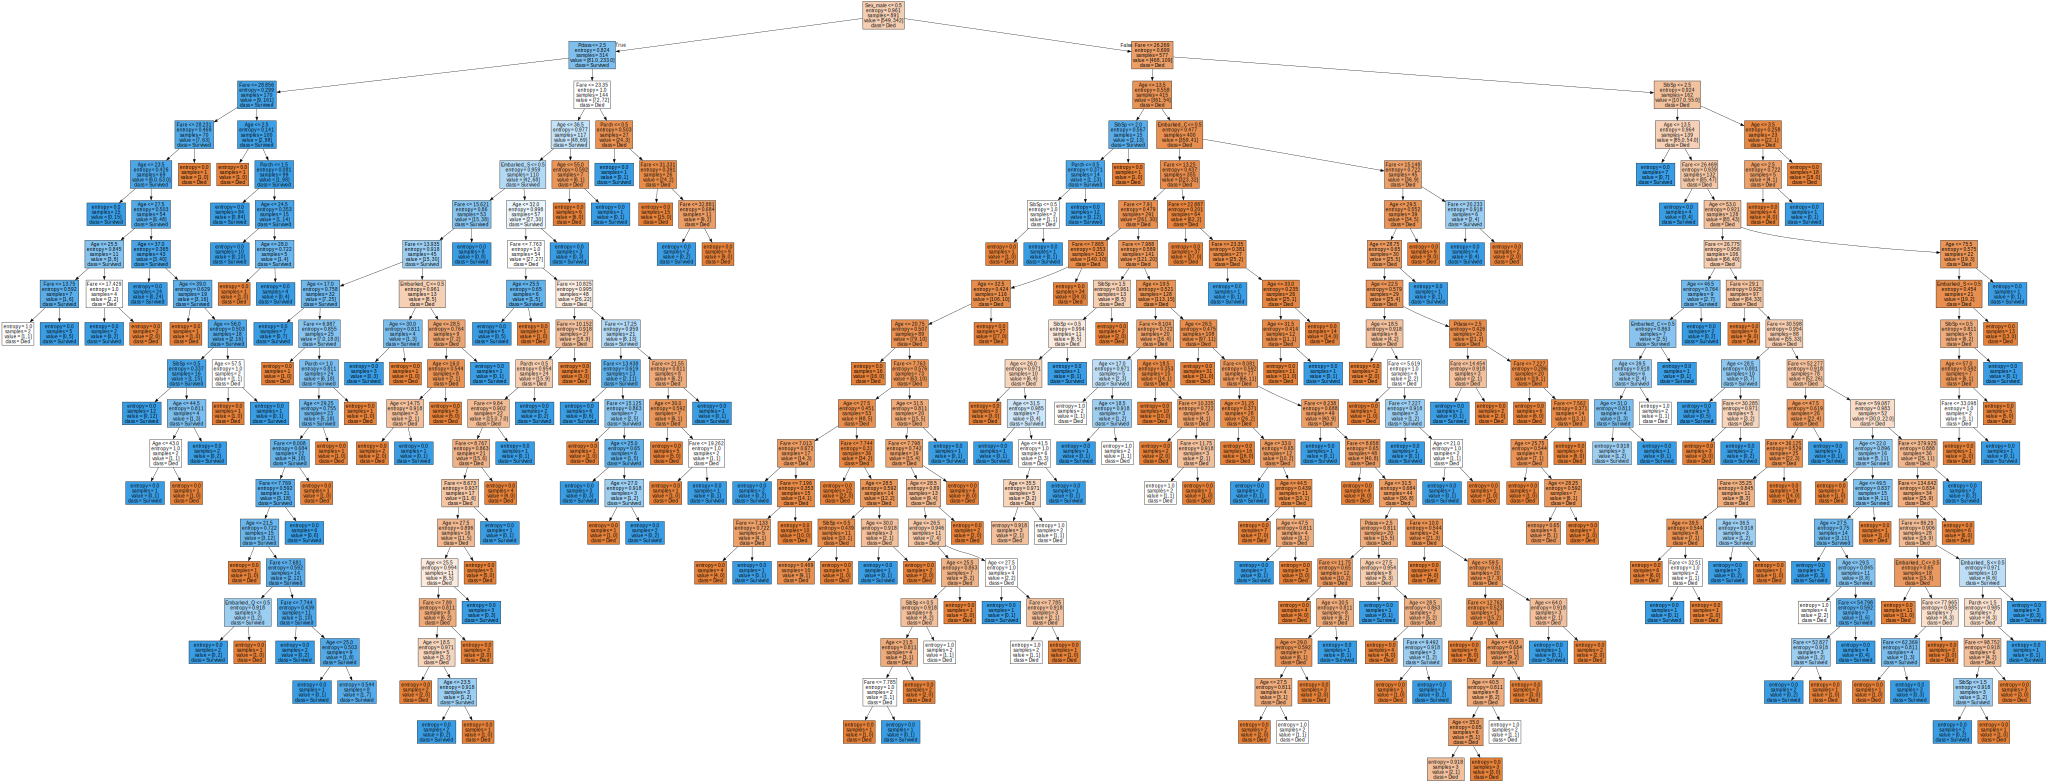

In [32]:
graph = Source(tree.export_graphviz(clf, out_file=NonCabine, feature_names=list(X), class_names=['Died', 'Survived'], filled=True))
display(SVG(graph.pipe(format='svg')))

# Проверка гипотезы риска переобучения (без глубины) при разбивке на другие тренировочные и тестовые данные (тестовые данные хуже предсказываются)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [37]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.9798657718120806

In [38]:
clf.score(X_test, y_test)

0.7728813559322034

# Создание дерева с ограниечнной глубиной (результат предсказания тренировочных и тестовых данных идентичный, нет переобучения)

In [42]:
clf = tree.DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [43]:
clf.fit(X_train, y_train)
clf.score(X_train, y_train)

0.8238255033557047

In [44]:
clf.score(X_test, y_test)

0.8203389830508474